# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

# Extract desired Stock data from yfinance

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

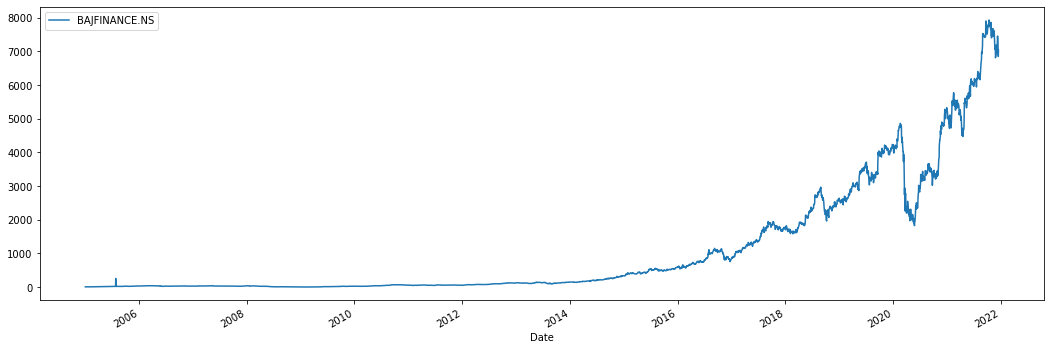

In [5]:
ticker = ('BAJFINANCE.NS')
stock_data = pd.DataFrame() 
stock_data[ticker]= yf.download(ticker,start='2005-01-01',end= '2021-12-17')['Adj Close']
#Plot Amazon Stock 
stock_data.plot(figsize=(18,6))


# calculate hitorical log returns

<AxesSubplot:ylabel='Density'>

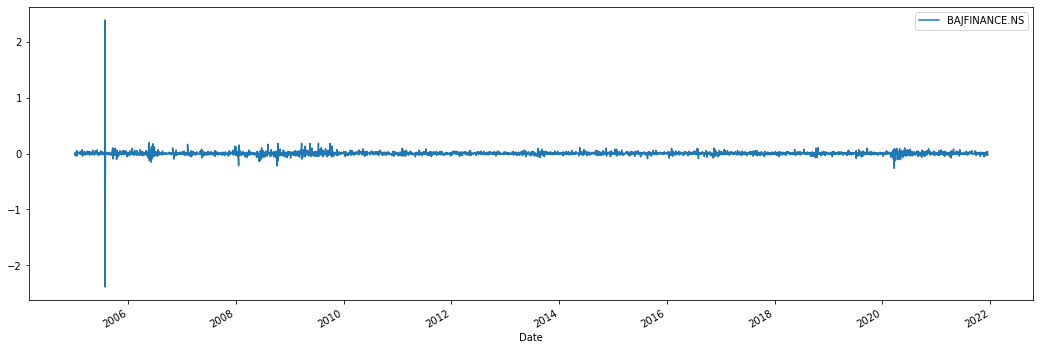

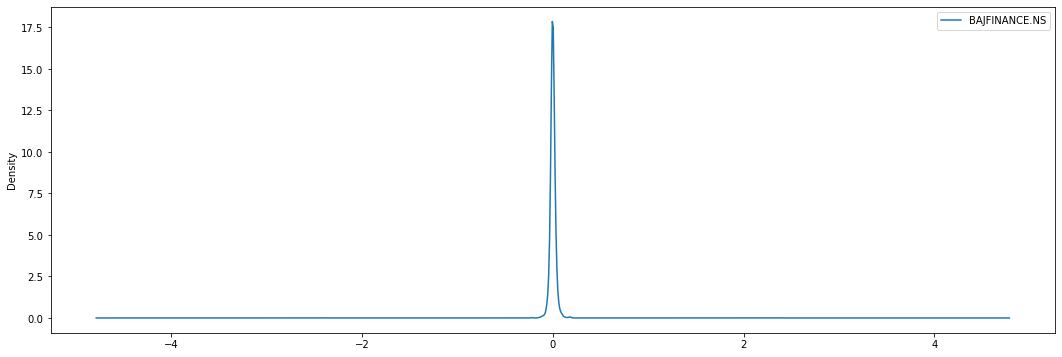

In [6]:
log_return = np.log(1+stock_data.pct_change())
#show all the log return
log_return.plot(figsize=(18,6))
#Show the distribution of the log return
log_return.plot.density(figsize=(18,6))

# Calculate key statistical measures

In [7]:
mean = log_return.mean()
variance = log_return.var()
standard_deviation = log_return.std()
drift = mean - (0.5 * variance) 

# Explain np.random.rand

In [9]:
test1 = np.random.rand(2,5)
test1

array([[0.69419715, 0.95434685, 0.81749609, 0.83394812, 0.17069695],
       [0.47121542, 0.23703845, 0.80960304, 0.45990198, 0.70223593]])

# Explain norm.ppf

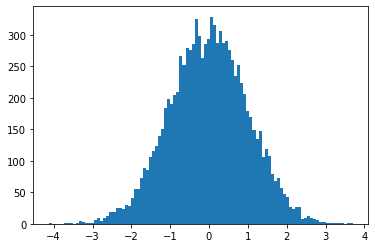

In [10]:
test2 = norm.ppf(np.random.rand(10000))
plt.hist(test2, bins = 100);

# Forecast future daily returns

In [11]:
t_interval = 250
simulate = 10000
daily_simulatedreturns = np.exp(drift.values + standard_deviation.values * norm.ppf(np.random.rand(t_interval,simulate)))
daily_simulatedreturns

array([[0.94906087, 0.95720719, 0.96175688, ..., 0.88363469, 0.96776934,
        1.02123581],
       [0.95302111, 0.98741299, 1.11672634, ..., 1.0184754 , 0.99635017,
        1.00998385],
       [1.12119977, 1.00815765, 1.02297804, ..., 1.01354765, 1.11039303,
        0.94128495],
       ...,
       [1.11982409, 0.99287066, 1.01707055, ..., 1.02940514, 1.02628699,
        0.89579454],
       [1.01745358, 0.89861178, 0.96092342, ..., 1.00389165, 1.09804731,
        0.87026601],
       [1.07029648, 0.97994825, 0.98024671, ..., 1.013485  , 1.03701499,
        0.92571432]])

# Create the variable for the latest price of Bajaj Finance Stock

In [12]:
last_price = stock_data.iloc[-1]

#prepare an array for the price simulation
price_list = np.zeros_like(daily_simulatedreturns)

#set the first row to the starting stdck price 
price_list[0] = last_price
price_list

array([[7028.85009766, 7028.85009766, 7028.85009766, ..., 7028.85009766,
        7028.85009766, 7028.85009766],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ]])

# Monte Carlo Simultaion

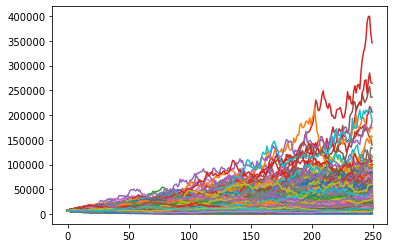

In [13]:
for t in range(1, t_interval):
    price_list[t] = price_list[t-1] * daily_simulatedreturns[t]
# plot the the graph of future 10,000 prices

plt.plot(price_list);

# Example of Bull, Bear & Base case scenario

# Bear Case

In [15]:
print ("Bear Case Share Price:")
round(price_list.min())


Bear Case Share Price:


169

# Bull Case

In [18]:
print ("Bull Case Share Price:")
round(price_list.max())

Bull Case Share Price:


399841

# Average Case

In [21]:
print ("Average Case Share Price:")
round(price_list.mean())

Average Case Share Price:


8569

# Set up confidence intervals

In [22]:
upper68 = price_list[-1].mean() + price_list[1].std()
lower68 = price_list[-1].mean() - price_list[1].std()
upper95 = price_list[-1].mean() + price_list[1].std()*2
lower95 = price_list[-1].mean() - price_list[1].std()*2

# Print the values 68%  Upper Price range

In [24]:
print("68% Price Range upper")
round(upper68)

68% Price Range upper


10783

# Print the values 68%  Lower Price range

In [25]:
print("68% Price Range Lower")
round(lower68)

68% Price Range Lower


9947

# print the values 95% Higher Price range

In [28]:
print("95% Price Range upper")
round(upper95)

95% Price Range upper


11200

# print the values 95% Lower Price range

In [29]:
print("95% Price Range upper")
round(lower95)

95% Price Range upper


9529